# Investigando filmes da Netflix
A Netflix é um dos principais serviços de streaming de todo mundo, e sabemos que há um enorme acervo disponível em sua plataforma, além dos vários filmes e séries que já passaram por lá e foram retirados de seu catálogo, já que a Netflix trabalha nesse ramo desde 1997. 

Mediante desse grande acervo, é de se imaginar que existam muitos dados sobre o mesmo, o que pode nos trazer vários insights, além de nos permitir responder diversas perguntas.

Diante desse fato, queremos refutar (ou não), as seguintes hipóteses:

    1. A duração dos filmes vem diminuindo com o passar dos anos?
    2. Se sim, isso vale para todos os gêneros?

Usando ferramentas como pandas para a manipulação de dados e matplotlib para a visualização, vamos tentar responder essas, e eventuais perguntas que surgirem. Vamos lá!


In [1]:
#Importando bibliotecas necessárias para a realização do projeto
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ler o CSV e guardá-lo em um daaframe (adquirido no Kaggle)
netflix_df = pd.read_csv("netflix_titles.csv")

# Visualizar as primeiras linhas do dataframe
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Aplicando filtros
Temos o nosso dataframe, porém na segunda coluna "type", observamos que além de filmes, também temos Shows de TV, que não são necessários para responder nossas perguntas, portante vamos retirálos. Além disso, existem muitas colunas que não são necessárias para a nossa análise, então vamos retirá-las também.

In [3]:
# Retirando as linhas que não são referente à filmes
netflix_df_movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [4]:
# Selecionando as colunas de interesse
netflix_df_movies_col_subset = netflix_df_movies[['title', "country", "listed_in", "release_year",  "duration"]]
netflix_df_movies_col_subset.head()

,title,country,listed_in,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020,90 min
6,My Little Pony: A New Generation,NaN,Children & Family Movies,2021,91 min
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies",1993,125 min
9,The Starling,United States,"Comedies, Dramas",2021,104 min
12,Je Suis Karl,"Germany, Czech Republic","Dramas, International Movies",2021,127 min


# Limpando os dados
Não há muitos dados a serem limpados, porém, a coluna "duration" apresenta sempre a string "min" ao final da linha, o que é algo que não nos ajudará a realizar as análises, portanto, vamos retirar. 

In [5]:
# Retirando a string 'min' da coluna duration
netflix_df_movies_col_subset['duration'] = netflix_df_movies_col_subset['duration'].str.replace('min','')


C:\Users\T-Gamer\anaconda3\envs\datasci\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Agora vamos checar se a coluna "duration" está como tipo de dado int, e se não, realizar a conversão

In [6]:
# Visualizando os tipos de dados das coluna
netflix_df_movies_col_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6131 non-null   object
 1   country       5691 non-null   object
 2   listed_in     6131 non-null   object
 3   release_year  6131 non-null   int64 
 4   duration      6128 non-null   object
dtypes: int64(1), object(4)
memory usage: 287.4+ KB


In [7]:
# Visualizando o número de linhas com valores nulos (NaN) na coluna duration
print(netflix_df_movies_col_subset[netflix_df_movies_col_subset['duration'].isnull()])

                                     title        country listed_in  \
5541                       Louis C.K. 2017  United States    Movies   
5794                 Louis C.K.: Hilarious  United States    Movies   
5813  Louis C.K.: Live at the Comedy Store  United States    Movies   

      release_year duration  
5541          2017      NaN  
5794          2010      NaN  
5813          2015      NaN  


In [8]:
# Retirando NaN's da coluna duration
netflix_df_movies_col_subset['duration'] = pd.to_numeric(netflix_df_movies_col_subset['duration'], errors='coerce')

C:\Users\T-Gamer\anaconda3\envs\datasci\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
netflix_df_movies_col_subset['duration'] = netflix_df_movies_col_subset['duration'].astype(float)

C:\Users\T-Gamer\anaconda3\envs\datasci\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Visualizando os dados
Agora que já manipulamos nosso dataframe da forma como queríamos, tentar visualizar os dados em um gráfico de dispersão, o qual vamos relacionar a coluna "release_year" com a "duration", e já tentar responder nossa primeira pergunta: "A duração dos filmes diminuir com o passar dos anos?".

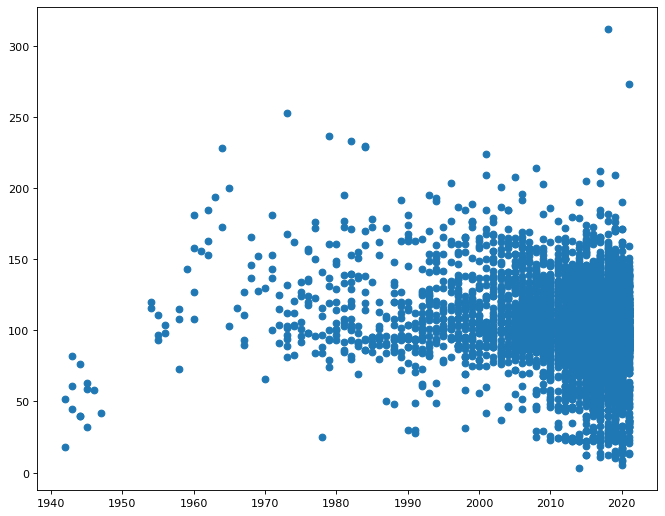

In [10]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter("release_year","duration", data = netflix_df_movies_col_subset)

## Indo mais à fundo
Percebe-se que com o passar dos anos, muitos filmes abaixo dos 60 minutos foram lançados. E com o objetivo de nos desprender mais insights, vamos olhar com mais atenção esses "filmes curtos"

In [11]:
netflix_df_movies_col_subset_short_movies = netflix_df_movies_col_subset[netflix_df_movies_col_subset['duration'] < 60]
netflix_df_movies_col_subset_short_movies.head(20)

,title,country,listed_in,release_year,duration
45,My Heroes Were Cowboys,NaN,Documentaries,2021,23.0
71,A StoryBots Space Adventure,NaN,Children & Family Movies,2021,13.0
77,Little Singham - Black Shadow,NaN,"Children & Family Movies, Comedies",2021,48.0
279,Monster Hunter: Legends of the Guild,"United States, Japan","Action & Adventure, Anime Features, Children &...",2021,59.0
470,Bridgerton - The Afterparty,NaN,Movies,2021,39.0
484,Lee Su-geun: The Sense Coach,NaN,Stand-Up Comedy,2021,46.0
495,Awon Boyz,NaN,"Documentaries, International Movies",2019,38.0
560,Audible,NaN,"Documentaries, Sports Movies",2021,39.0
694,Aziza,"Lebanon, Syria","Comedies, Dramas, Independent Movies",2019,13.0
695,Besieged Bread,NaN,"Dramas, International Movies",2015,12.0


Vamos verificar se a coluna que vamos usar para a análise está funcionando corretamente

In [12]:
# Verificando todas as possibilidades de gêneros presentes na coluna "listed in"]
# netflix_df_movies_col_subset_short_movies['listed_in'].unique()
# netflix_df_movies_col_subset_short_movies.sort_values('listed_in', ascending=False).drop_duplicates('listed_in')
netflix_df_movies_col_subset_short_movies_genres = netflix_df_movies_col_subset_short_movies[['listed_in']]
netflix_df_movies_col_subset_short_movies_genres

,listed_in
45,Documentaries
71,Children & Family Movies
77,"Children & Family Movies, Comedies"
279,"Action & Adventure, Anime Features, Children &..."
470,Movies
...,...
8707,"Documentaries, International Movies"
8723,Documentaries
8737,Documentaries
8759,Movies


Como pudemos observar, a coluna contém os gêneros, porém em uma mesma coluna, há vários gêneros (separados por vírgula), vamos resolver isso com o método split(), mas dessa vez, vamos modificar diretamente o dataframe de filmes curtos.

In [13]:
netflix_df_movies_col_subset_short_movies[['genre_1','genre_2','genre_3']] = netflix_df_movies_col_subset_short_movies.loc[:,'listed_in'].str.split(pat = ', ', expand = True)

C:\Users\T-Gamer\anaconda3\envs\datasci\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
netflix_df_movies_col_subset_short_movies

,title,country,listed_in,release_year,duration,genre_1,genre_2,genre_3
45,My Heroes Were Cowboys,NaN,Documentaries,2021,23.0,Documentaries,None,None
71,A StoryBots Space Adventure,NaN,Children & Family Movies,2021,13.0,Children & Family Movies,None,None
77,Little Singham - Black Shadow,NaN,"Children & Family Movies, Comedies",2021,48.0,Children & Family Movies,Comedies,None
279,Monster Hunter: Legends of the Guild,"United States, Japan","Action & Adventure, Anime Features, Children &...",2021,59.0,Action & Adventure,Anime Features,Children & Family Movies
470,Bridgerton - The Afterparty,NaN,Movies,2021,39.0,Movies,None,None
...,...,...,...,...,...,...,...,...
8707,"We, the Marines",United States,"Documentaries, International Movies",2017,38.0,Documentaries,International Movies,None
8723,What Makes a Psychopath?,United Kingdom,Documentaries,2017,52.0,Documentaries,None,None
8737,Why Are We Getting So Fat?,United Kingdom,Documentaries,2016,50.0,Documentaries,None,None
8759,World's Weirdest Homes,NaN,Movies,2015,49.0,Movies,None,None


Agora temos uma coluna com pelo menos três gêneros para cada filme, porém, algumas linhas não estão preenchidas nas colunas "genre_2" e "genre_3", portanto, vamos utilizar apenas a coluna "genre_1", mas antes, vamos verificar quais são os gêneros que podem ser encontrados nessa coluna.

In [15]:
netflix_df_movies_separeted_genres = netflix_df_movies_col_subset_short_movies[['genre_1']].drop_duplicates()
netflix_df_movies_separeted_genres


,genre_1
45,Documentaries
71,Children & Family Movies
279,Action & Adventure
470,Movies
484,Stand-Up Comedy
694,Comedies
695,Dramas
738,Anime Features
992,International Movies
1504,Music & Musicals


Também vamos visualizar quantos filmes aparecem para cada gênero, a fim de visualizar qual tem a maior ocorrência.
(Essa também é outra forma de visualizar quais são os gêneros presentes nessa coluna)

In [16]:
netflix_df_movies_col_subset_short_movies[['genre_1']].value_counts()

genre_1                 
Documentaries               163
Children & Family Movies    115
Stand-Up Comedy              75
Movies                       41
Comedies                     21
Dramas                       16
Action & Adventure            8
Classic Movies                8
Anime Features                4
International Movies          4
Music & Musicals              2
Horror Movies                 1
dtype: int64

## Marcando filmes classificados como curta metragem
Parece que a grande maioria dos filmes que tem menos de 60 minutos são classificados nos gêneros de Documentários, Crianças e família e Stand-up (além de alguns outros), o que é bem condizente com o que vemos na maioria dos filmes.

Nós poderiamos fazer novamente um gráfico de dispersão para cada gênero, mas outra forma muito interessante de visualização, é através da marcação de cores para cada gênero para no mesmo gráfico.

Há várias maneiras de fazer isso, mas nessa análise, vamos usar um loop para gerar uma lista de cores baseados no que está na coluna que contém os gêneros.

Antes, vamos gerar a coluna com os gêneros para o dataframe com todos os filmes (até os que tem mais de 60 minutos)

In [19]:
netflix_df_movies_col_subset[['genre','genre_2','genre_3']] = netflix_df_movies_col_subset['listed_in'].str.split(pat = ', ', expand = True)

C:\Users\T-Gamer\anaconda3\envs\datasci\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Pronto, agora podemos trabalhar nas iterações!

In [24]:
# Criação de lista para armazenar as cores
colors = []

# Iteração pelas linhas do dataframe
for column, row in netflix_df_movies_col_subset.iterrows():
    if row['genre'] == 'Documentaries':
        colors.append('r') # Documentários em vermelho
    elif row['genre'] == 'Children & Family Movies':
        colors.append('g') # Crianças e para a família em verde
    elif row['genre'] == 'Stand-Up Comedy':
        colors.append('m') # Stand-up em magenta (ou rosa)
    elif row['genre'] == 'Comedies':
        colors.append('b') # Comédia em azul
    elif row['genre'] == 'Dramas':
        colors.append('c') # Drama em ciano 
    else:
        colors.append('k') # Outros gêneros em preto
        
# Listar as primeiras 11 cores da lista 
colors[:11]

['r', 'g', 'c', 'b', 'c', 'g', 'r', 'k', 'b', 'g', 'b']

## Plotando com cor!
Parece que nosso looping deu certo! Agora vamos passar essas mesmas cores para o gráfico de dispersão, o que vai nos permitir verificar quais desses gêneros estão fazendo a média de duração dos filmes cair tanto.

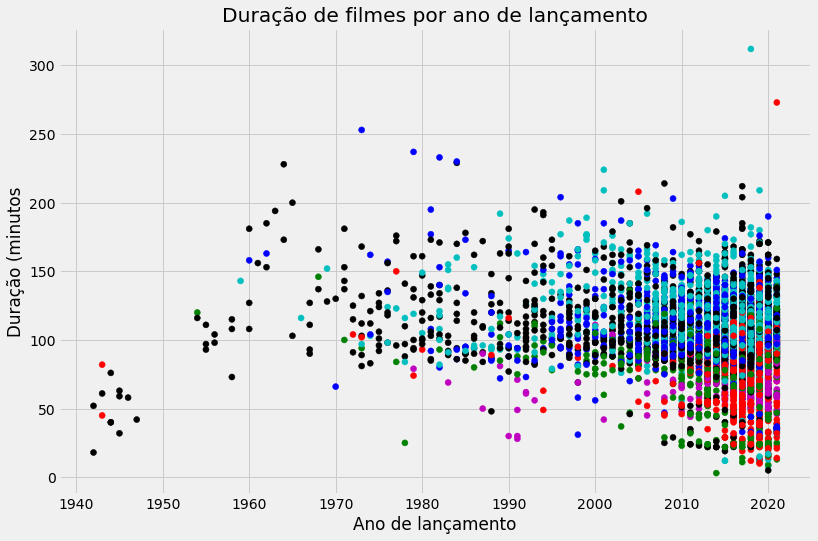

In [46]:
# Adicionar o estilo da figura e inicializa-la
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (12, 8))

# Criar um gráfico de dispersão relacionando a duração com o ano de lançamento do filme
plt.scatter('release_year', 'duration', data = netflix_df_movies_col_subset, c = colors)

# Criar um título para o gráfico e para os eixos
plt.title('Duração de filmes por ano de lançamento')
plt.xlabel('Ano de lançamento')
plt.ylabel('Duração (minutos')

# Mostrar o gráfico
plt.show()

## Considerações finais
Como era de se esperar, obsersavamos que os filmes de Documentários e para Crianças e família se concentram mais na parte inferior do gráfico, mas isso não é o bastante e seriam necessárias análises mais aprofundadas para responder com uma maior precisão.

Porém, já é o bastante para respondermos as perguntas que fizemos no início desta análise:

    1. A duração dos filmes vem diminuindo com o passar dos anos?
    2. Se sim, isso vale para todos os gêneros?

E para a primeira pergunta, sim! Pelo gráfico, é fácil perceber que a duração da maioria dos filmes lançados nos anos mais recentes, estão diminuindo. Porém, isso não vale para todos os gêneros de filme. Com uma análise bem visual, percebemos que os filmes para Crianças e Família e Documentários tendem a apresentar durações cada vez menores, o que não acontece tão notávelmente com os filmes de Drama, que em grande parte mantém durações maiores do que 90 minutos.

Essa foi uma análise simples e objetiva, mas que acarretou em grandes aprendizados.
Espero que tenha gostado!